In [108]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
Gas_data = pd.read_csv('GasPrices.csv').iloc[:, 1:]

In [109]:
print(Gas_data.shape)
Gas_data.head(2)

(101, 17)


,ID,Name,Price,Pumps,Interior,Restaurant,CarWash,Highway,Intersection,Stoplight,IntersectionStoplight,Gasolines,Competitors,Zipcode,Address,Income,Brand
0,1,Shell,1.79,4,Y,N,N,N,Y,N,Intersection,3,N,78705,3201 N Lamar Blvd,12786,Shell
1,2,Valero,1.83,4,Y,N,N,N,Y,N,Intersection,3,N,78705,3515 N Lamar Blvd,12786,Other


In [110]:
summary=Gas_data.describe(include=[np.number])
summary[['Price','Pumps','Gasolines','Income']]

,Price,Pumps,Gasolines,Income
count,101.000000,101.000000,101.000000,101.000000
mean,1.864257,6.950495,3.465347,56727.217822
std,0.081515,3.925242,0.557931,25868.359804
min,1.730000,2.000000,1.000000,12786.000000
25%,1.790000,4.000000,3.000000,37690.000000
50%,1.850000,6.000000,3.000000,52306.000000
75%,1.920000,8.000000,4.000000,70095.000000
max,2.090000,24.000000,4.000000,128556.000000


In [111]:
group_by_name = Gas_data.groupby(by=['Name'])
Gas_data_avg = group_by_name.mean()
Gas_data_avg[['Price','Pumps','Income']]

,Price,Pumps,Income
Name,,,
7-Eleven,1.887778,4.666667,53432.333333
Around the Corner Store,1.940000,2.000000,63750.000000
Chevron,1.871818,8.727273,61754.636364
Citgo,1.835000,4.000000,49387.000000
Conoco,1.890000,4.000000,43545.500000
Costco,1.730000,12.000000,70095.000000
Double R Grocery,1.790000,4.000000,37690.000000
East 1st Grocery,1.770000,4.000000,37690.000000
Exxon,1.855000,11.500000,52344.333333


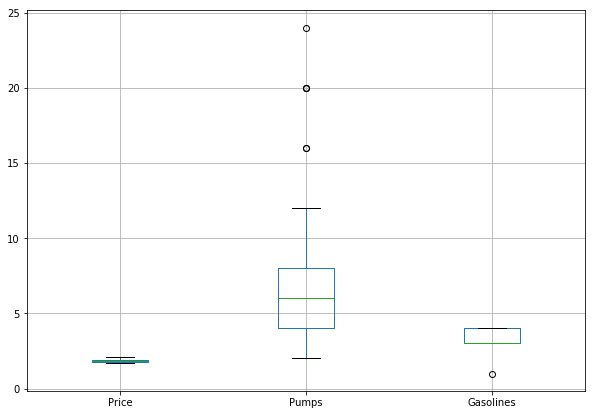

In [112]:
Gas_data[['Price','Pumps','Gasolines']].boxplot(figsize=(10,7))
plt.show()

In [192]:
def mean(values):
    return sum(values) / float(len(values))
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar
# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])
# Calculate coefficients
def LEARNSIMPLELINREG(x,y):
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]
# Calculate predictions
def PREDICTSIMPLELINREG(x, y, b):     
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
    return y_pred 
# plotting
def plott(x, y, y_pred,title):
    # plotting the points as per dataset on a graph
    plt.scatter(x, y, color = "m",marker = "o", s = 30) 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
    # putting labels for x and y axis
    plt.suptitle(title, fontsize=16)
    plt.xlabel('Price') 
    plt.ylabel('Income')   
    # function to show plotted graph
    plt.show()    
def RMSE(y,y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

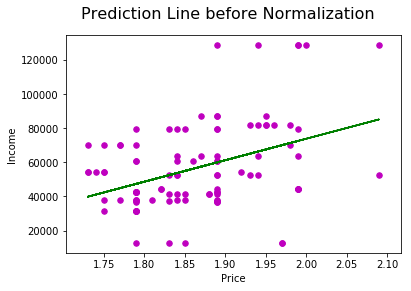

In [114]:
x1=Gas_data['Price']
y1=Gas_data['Income']
b1 = LEARNSIMPLELINREG(x1, y1) 
y_pre1=PREDICTSIMPLELINREG(x1, y1, b1)
plott(x1, y1, y_pre1,'Prediction Line before Normalization')

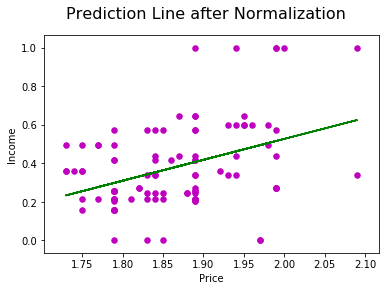

In [117]:
Normalized_y2 = (y1-min(y1))/(max(y1)-min(y1))
y2=Normalized_y2
x2=x1
b2=LEARNSIMPLELINREG(x2, y2) 
y_pre2=PREDICTSIMPLELINREG(x2, y2, b2)
plott(x2, y2, y_pre2,'Prediction Line after Normalization')

In [118]:
Xdata = Gas_data
Ydata = Gas_data['Income']
Xdata.head(2)

,ID,Name,Price,Pumps,Interior,Restaurant,CarWash,Highway,Intersection,Stoplight,IntersectionStoplight,Gasolines,Competitors,Zipcode,Address,Income,Brand
0,1,Shell,1.79,4,Y,N,N,N,Y,N,Intersection,3,N,78705,3201 N Lamar Blvd,12786,Shell
1,2,Valero,1.83,4,Y,N,N,N,Y,N,Intersection,3,N,78705,3515 N Lamar Blvd,12786,Other


In [119]:
Xdata=Xdata[['Price','Pumps','Gasolines']]
Xdata.head(2)

,Price,Pumps,Gasolines
0,1.79,4,3
1,1.83,4,3


In [120]:
msk = np.random.rand(len(Xdata))<0.8
Xtrain = Xdata[msk]
Ytrain = Ydata[msk]
Ytrain

0       12786
1       12786
2       41279
3       41279
4       41279
5       37396
6       37396
7       37396
8       37396
9       41279
10      12786
11      12786
12      12786
13      87306
14      37690
16      54526
17      42615
19      54526
20      54526
21      37690
22      37690
23      36698
24      37690
26      36698
27      42615
28      42615
30      42615
31      42615
32      42615
33      41279
        ...  
64      79315
66     128556
67     128556
68     128556
69     128556
70     128556
71      52306
73      52306
76      52306
77      52306
78      81903
79      81903
80      81903
82      81903
83      63750
84      63750
85      63750
86      63750
88      79315
89      79315
90      79315
91      70095
92      70095
93      70095
94      70095
95      70095
96      70095
97      44476
99      44476
100     81903
Name: Income, Length: 82, dtype: int64

In [121]:
Xtest = Xdata[~msk]
Ytest = Ydata[~msk]
Ytest

15     54526
18     42615
25     36698
29     42615
36     41279
44     31192
45     31192
49     31192
50     52306
56     60856
59     60856
60     60856
65    128556
72     52306
74     52306
75     52306
81     81903
87     79315
98     44476
Name: Income, dtype: int64

In [269]:
from numpy.linalg import inv
def learn_linreg_NormEq(X, y):
    #print("inside")
    X_transpose = X.T  
    best_params = inv(X_transpose.dot(X)).dot(X_transpose).dot(y)  
    # normal equation
    # predictedY = beta[0] + beta[1]*Xtest['Price']+ beta[2]*Xtest['Pumps']+beta[3]*Xtest['Gasolines']
    # theta_best = (X.T * X)^(-1) * X.T * y  
    return best_params # returns a list  

In [268]:
params=learn_linreg_NormEq(Xtrain,Ytrain)
#print(params)
# test prediction   
y_prediction = Xtest.dot(params)  
# y = h_Theta_X(Theta) = Theta.T * X  
#print(y_prediction.shape) 
residual=np.abs(y_prediction-Ytest)
#print("The Predictions of Xtest are",y_prediction)
#print("The average error of generic model is ",np.mean(residual))

Text(0.5,1,'Test values of Y')

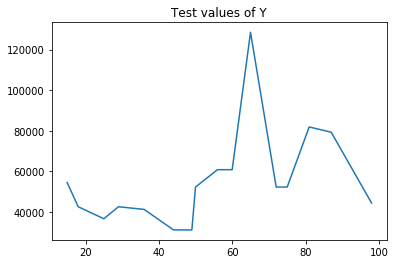

In [251]:
plt.plot(Ytest)
plt.title("Test values of Y")

The Predictions of Matrix decomposition are 15    9.691335e+06
18    1.456849e+07
25    1.180864e+07
29    9.307275e+06
36    1.227666e+07
44    9.943200e+06
45    1.185097e+07
49    9.307275e+06
50    1.099890e+07
56    1.096283e+07
59    9.727050e+06
60    1.117272e+07
65    1.159249e+07
72    1.006878e+07
74    1.477838e+07
75    9.475185e+06
81    1.146656e+07
87    1.078275e+07
98    1.095657e+07
dtype: float64
The average error of Matrix decomposition is  11036774.090821216


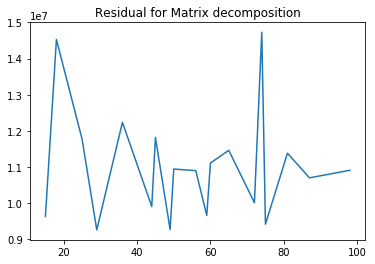

In [252]:
import scipy.linalg as la
A=Xtrain
P, L, U = la.lu(A)
#print(P.shape)
#print(L.shape)
#print(U.shape)
#print(Ytrain.shape)
params1=L.T.dot(Ytrain)
#print(params1)
y_prediction1 = Xtest.dot(params1)
error1=np.abs(y_prediction1 - Ytest)
print("The Predictions of Matrix decomposition are",y_prediction1)
print("The average error of Matrix decomposition is ",np.mean(error1))
plt.plot(error1)
plt.title("Residual for Matrix decomposition")
plt.show()

The Predictions of Cholesky are 15    1.541759e+07
18    3.198744e+07
25    2.262845e+07
29    1.352564e+07
36    2.451033e+07
44    1.538736e+07
45    2.097252e+07
49    1.352564e+07
50    1.719869e+07
56    2.079193e+07
59    1.347525e+07
60    2.076673e+07
65    2.071635e+07
72    1.702314e+07
74    3.196225e+07
75    1.350549e+07
81    2.073146e+07
87    1.528659e+07
98    1.885463e+07
dtype: float64
The average error of Cholesky is  19327901.28860306


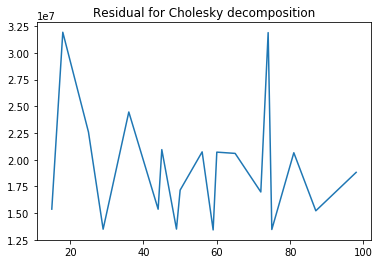

In [266]:
A=np.dot(Xtrain.T, Xtrain)
L = la.cholesky(A)
b = np.dot(Xtrain.T, Ytrain)
y=la.lstsq(L,b)[0]
params2=la.lstsq (L.T,y)
y_prediction3 = Xtest.dot(params2[0])
error3=np.abs(y_prediction3 - Ytest)
print("The Predictions of Cholesky are",y_prediction3)
print("The average error of Cholesky is ",np.mean(error3))
plt.plot(error3)
plt.title("Residual for Cholesky decomposition")
plt.show()

The predictions of QR is  15   -2.941478e+06
18   -7.878939e+06
25   -4.510065e+06
29   -2.276344e+06
36   -5.179520e+06
44   -2.954438e+06
45   -4.988723e+06
49   -2.276344e+06
50   -3.654133e+06
56   -3.821170e+06
59   -2.297944e+06
60   -3.831970e+06
65   -3.853571e+06
72   -2.484421e+06
74   -7.889739e+06
75   -2.284984e+06
81   -3.847091e+06
87   -2.997639e+06
98   -3.175476e+06
dtype: float64
The average error of QR is  3904281.001148893


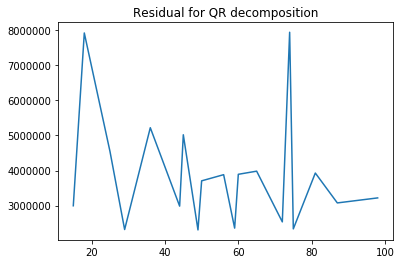

In [253]:
from numpy.linalg import qr
Q, R = qr(A, 'complete')
#print(Q.shape)
#print(R.shape)
params2=R.T.dot(Ytrain)
#print(params2)
y_prediction2 = Xtest.dot(params2)
error2=np.abs(y_prediction2 - Ytest)
print("The predictions of QR is ", y_prediction2)
print("The average error of QR is ",np.mean(error2))
plt.plot(error2)
plt.title("Residual for QR decomposition")
plt.show()

In [267]:
RMSEGaussian = RMSE(Ytest,y_prediction1)
RMSEQR = RMSE(Ytest,y_prediction2)
RMSECholesky = RMSE(Ytest,y_prediction3)
print("The RMSE of Cholesky model is ",RMSECholesky)
print("The RMSE of Gaussian Matrix Decomposition",RMSEGaussian)
print("The RMSE of QR Decomposition", RMSEQR)

The RMSE of Cholesky model is  20077352.96129315
The RMSE of Gaussian Matrix Decomposition 11140783.175918583
The RMSE of QR Decomposition 4230855.170320108
